In [2]:
import numpy as np
import itertools
import pygsti
import pickle
from matplotlib import pyplot as plt
from matplotlib import colormaps as cmaps

In [4]:
nrest=5
nmeas = 2

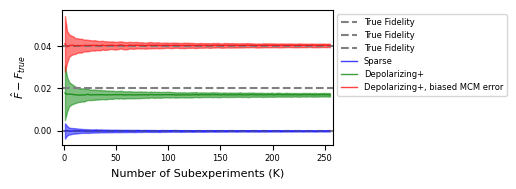

In [49]:
plt.figure(figsize=(3.5,1.75))
models = [f'plist_{j}' for j in range(1)]+[f'depol_{j}' for j in range(2)]
colors = ['blue', 'green', 'red', 'purple', 'orange']
model_name_nice = ['Sparse', 'Depolarizing+', 'Depolarizing+, biased MCM error'] #'No error on measured qubits', 'Dense error model', 'Local Depolarizing error+MCM crosstalk', 'Sparse error model','High MCM error']
for i, model_name in enumerate(models):
    all_eval_dict = {}
    for nmeas in num_meas:
        for nrest in num_unmeas:
            for idx in idxs:
                with open(f'results/all-paulis/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}_{model_name}.pkl', 'rb') as f:
                    result_dict = pickle.load(f)
                eval_dict = result_dict['evals_by_p']
                f = result_dict['fidelity']
                all_eval_dict.update(eval_dict)
                
    Ns = np.arange(1,256, 2)
    niter = 400
    results = []
    stds = []
    for n_samples in Ns:
        temp_results = []
        for _ in range(niter):
            chosen_paulis = np.random.choice(unmeas_paulis, n_samples)
            chosen_toggles = [toggles[i] for i in np.random.choice(range(len((toggles))), n_samples)]
            all_evals = [all_eval_dict[(mp+p, t)] for mp in meas_paulis for p,t in zip(chosen_paulis,chosen_toggles)]
            temp_results.append(sum(all_evals)/len(all_evals))
        stds.append(np.std(temp_results))
        results.append(temp_results)  
    
    if model_name=='_meas_dominant':
        inf = (1-f)/0.1
        f = (1-0.1*inf)*(1-inf)**2
        
    ys = np.array([np.mean(l)-f+0.02*i for l in results])
    error = np.array([np.std(l) for l in results])
    plt.fill_between(Ns, ys-error, ys+error, color=colors[i], alpha=0.5)
    plt.errorbar(Ns,ys, linewidth=1, elinewidth=1, color=colors[i], label=model_name_nice[i], alpha=0.75)
    plt.axhline(0.02*i, color='gray', linestyle='dashed', label='True Fidelity')
plt.ylabel(r'''$\hat{F}-F_{true}$''', fontsize=8)
plt.xlabel('Number of Subexperiments (K)', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlim(-2,258)
plt.legend(fontsize=6, bbox_to_anchor=(1,1))

plt.savefig(f'plots/new_convergence_multi_model_v2_2.pdf')

plt.show()

/tmp/ipykernel_1264329/201519083.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_1264329/201519083.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_1264329/201519083.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


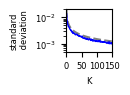

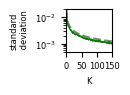

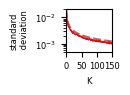

In [100]:
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, variance in enumerate(variances):

    plt.figure(figsize=(0.6,0.55))        
    
    plt.errorbar(Ns,stds, marker='none', linewidth=1, elinewidth=1, label=f'{model_name_nice[i]}', color=colors[i])
    xs = np.linspace(0.01,1000,1000)
    plt.plot(xs, [(1.5e-2)/np.sqrt(x) for x in xs], linestyle='--', color='gray', label=r'''1/K''')
    plt.ylabel('standard\n deviation', fontsize=6)
    plt.xlabel('K', fontsize=6)
    plt.yticks(fontsize=6)
    plt.xticks([0,50,100,150], fontsize=6)
    plt.xlim(-2,150)
    plt.ylim(5e-4,0.02)
    plt.yscale('log')
    plt.tight_layout()
    plt.savefig(f'plots/convergence_std_{i}.pdf')

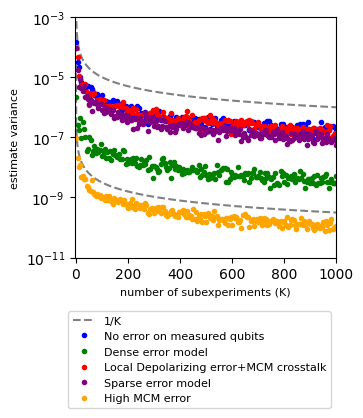

In [38]:
plt.figure(figsize=(3.375,3.125))
models = ['_indep', '_dense', '_depol', '', '_meas_dominant']
colors = ['blue', 'green', 'red', 'purple', 'orange']
model_name_nice = ['No error on measured qubits', 'Dense error model', 'Local Depolarizing error+MCM crosstalk', 'Sparse error model', 'High MCM error']
for i, model_name in enumerate(models):
    all_eval_dict = {}
    for nmeas in num_meas:
        for nrest in num_unmeas:
            for idx in idxs:
                with open(f'results/all-paulis/{nmeas}_{nrest}_qubit_mcmcb_run_{idx}{model_name}.pkl', 'rb') as f:
                    result_dict = pickle.load(f)
                eval_dict = result_dict['evals_by_p']
                f = result_dict['fidelity']
                all_eval_dict.update(eval_dict)
                
    Ns = np.arange(1,1024, 5)
    niter = 30
    results = []
    stds = []
    for n_samples in Ns:
        temp_results = []
        for _ in range(niter):
            chosen_paulis = np.random.choice(unmeas_paulis, n_samples)
            chosen_toggles = [toggles[i] for i in np.random.choice(range(len((toggles))), n_samples)]
            all_evals = [all_eval_dict[(mp+p, t)] for mp in meas_paulis for p,t in zip(chosen_paulis,chosen_toggles)]
            temp_results.append(sum(all_evals)/len(all_evals))
        stds.append(np.std(temp_results)**2)
        results.append(temp_results)  
        
    
    plt.errorbar(Ns,stds, marker='.', linewidth=0, elinewidth=1, label=f'{model_name_nice[i]}', color=colors[i])
xs = np.linspace(0.01,1000,1000)
plt.plot(xs, [(1e-3)/x for x in xs], linestyle='--', color='gray', label=r'''1/K''')
plt.plot(xs, [(10**(-6.5))/x for x in xs], linestyle='--', color='gray')
plt.ylabel('estimate variance', fontsize=8)
plt.xlabel('number of subexperiments (K)', fontsize=8)
plt.xlim(-5,1000)
plt.ylim(1e-11,0.001)
plt.yscale('log')
plt.legend(loc='upper right', fontsize=8, bbox_to_anchor=(1,-0.2))
plt.savefig(f'plots/convergence_std_{nmeas}_{nrest}.pdf')